In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.stats.outliers_influence as sms
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('divorce_factor.csv')
df

,relationship_dynamics,communication_pattern,negative_interaction,external_stressors,Divorce_Y_N
0,-0.746628,-0.963401,0.789629,-0.496849,1
1,1.417390,-0.914318,0.030392,-0.408152,1
2,0.824398,-0.124829,-1.308631,2.845540,1
3,1.034521,-0.554783,-0.873702,3.162281,1
4,-0.082114,0.138233,-1.001100,-0.096981,1
...,...,...,...,...,...
165,-1.591673,-2.573143,2.459211,-0.687193,0
166,-1.609503,0.642635,0.229238,-0.457197,0
167,-0.447329,0.234817,-0.934859,-0.399774,0
168,-1.504161,0.421215,0.294074,-0.531913,0


In [12]:
df.corr()

,relationship_dynamics,communication_pattern,negative_interaction,external_stressors,Divorce_Y_N
relationship_dynamics,1.000000e+00,1.196005e-12,-2.094096e-13,7.483665e-12,0.708907
communication_pattern,1.196005e-12,1.000000e+00,-9.064495e-12,6.549521e-12,0.291057
negative_interaction,-2.094096e-13,-9.064495e-12,1.000000e+00,-9.591282e-12,0.498856
external_stressors,7.483665e-12,6.549521e-12,-9.591282e-12,1.000000e+00,0.306034
Divorce_Y_N,7.089074e-01,2.910573e-01,4.988556e-01,3.060340e-01,1.000000


In [3]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [sms.variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

calc_vif(df[['relationship_dynamics', 'communication_pattern','negative_interaction', 'external_stressors']])

,variables,VIF
0,relationship_dynamics,1.0
1,communication_pattern,1.0
2,negative_interaction,1.0
3,external_stressors,1.0


In [3]:
X = df.drop(columns=['Divorce_Y_N'], axis=1)
y = df['Divorce_Y_N']

In [4]:
X.columns

Index(['relationship_dynamics', 'communication_pattern',
       'negative_interaction', 'external_stressors'],
      dtype='object')

In [5]:
X

,relationship_dynamics,communication_pattern,negative_interaction,external_stressors
0,-0.746628,-0.963401,0.789629,-0.496849
1,1.417390,-0.914318,0.030392,-0.408152
2,0.824398,-0.124829,-1.308631,2.845540
3,1.034521,-0.554783,-0.873702,3.162281
4,-0.082114,0.138233,-1.001100,-0.096981
...,...,...,...,...
165,-1.591673,-2.573143,2.459211,-0.687193
166,-1.609503,0.642635,0.229238,-0.457197
167,-0.447329,0.234817,-0.934859,-0.399774
168,-1.504161,0.421215,0.294074,-0.531913


In [10]:
X1 = sm.add_constant(X)
model  = sm.Logit(y, X1).fit_regularized(alpha=1)
print(model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10943675960696056
            Iterations: 39
            Function evaluations: 39
            Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:            Divorce_Y_N   No. Observations:                  170
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.9105
Time:                        20:05:13   Log-Likelihood:                -10.541
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 2.770e-45
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [11]:

yhat = model.predict(X1) 
prediction = list(map(round, yhat))
print("accuracy_score is ", accuracy_score(y,prediction))

accuracy_score is  0.9764705882352941


In [12]:
confusion_matrix(y,prediction)

array([[86,  0],
       [ 4, 80]], dtype=int64)

<Axes: >

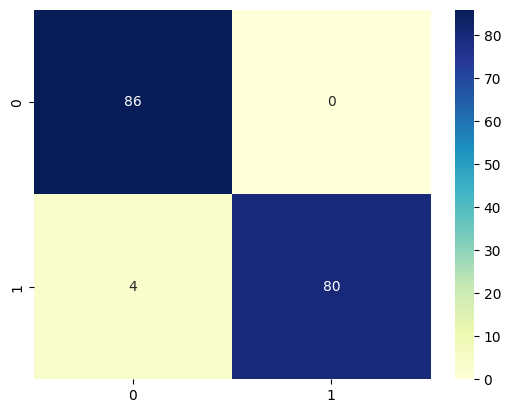

In [13]:
import seaborn as sns
sns.heatmap(confusion_matrix(y,prediction),annot=True,cmap="YlGnBu")